In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [3]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

In [4]:
tracks[class_name].value_counts()

0    81724
1    17680
Name: Attribution-Noncommercial-Share Alike 3.0 United States, dtype: int64

In [5]:
81724/(81724+17680)

0.8221399541265945

In [6]:
# Get indexes where name column has value xxx
indexNames = tracks[tracks['album_date_released_year'] <= 2009.5].index
 
# Delete these row indexes from dataFrame
tracks.drop(indexNames , inplace=True)

# Get indexes where name column has value xxx
indexNames = tracks[tracks['track_bit_rate'] <= 195132.5].index
 
# Delete these row indexes from dataFrame
tracks.drop(indexNames , inplace=True)

# Get indexes where name column has value xxx
indexNames = tracks[tracks['track_id'] <= 112324.0].index
 
# Delete these row indexes from dataFrame
tracks.drop(indexNames , inplace=True)


In [7]:
tracks[class_name].value_counts()

0    14267
1      923
Name: Attribution-Noncommercial-Share Alike 3.0 United States, dtype: int64

In [8]:
14267/(14267+923)

0.9392363396971692

In [9]:
923/(14267+923)

0.06076366030283081

*DATA PARTITIONING*

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [11]:
attributes = [col for col in tracks.columns if col != class_name]
X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [12]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1], dtype=int64), array([9987,  646], dtype=int64)),
 (array([0, 1], dtype=int64), array([4280,  277], dtype=int64)))

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.decomposition import PCA

In [14]:
X_train.shape

(10633, 15)

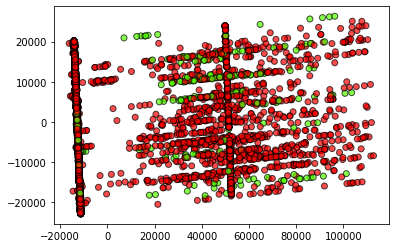

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
X_pca = pca.transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Resampled dataset shape Counter({0: 646, 1: 646})
Resampled dataset shape Counter({0: 652, 1: 646})
Resampled dataset shape Counter({0: 9965, 1: 646})
Resampled dataset shape Counter({0: 646, 1: 646})


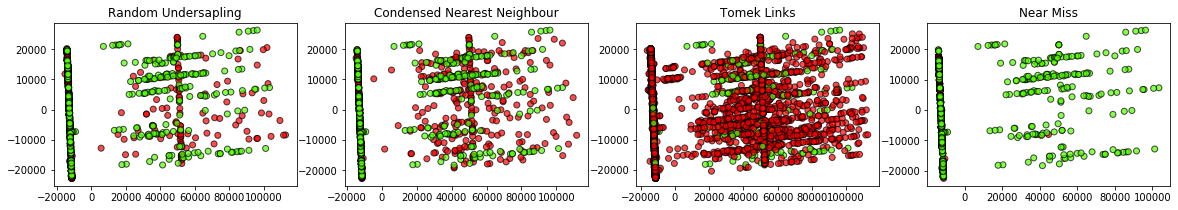

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20,3))

rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[0].set_title("Random Undersapling")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[1].set_title("Condensed Nearest Neighbour")

from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[2].set_title("Tomek Links")

from imblearn.under_sampling import OneSidedSelection #non funziona non si sa perche 
from imblearn.under_sampling import InstanceHardnessThreshold #neanche funziona
from imblearn.under_sampling import NearMiss
nm = NearMiss(sampling_strategy=1)
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[3].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[3].set_title("Near Miss")

plt.show()

Resampled dataset shape Counter({0: 9905, 1: 646})


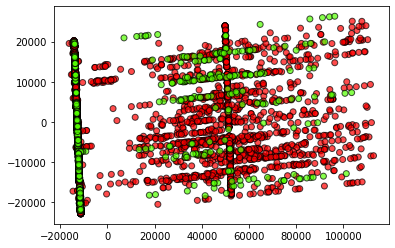

In [17]:
from imblearn.under_sampling import OneSidedSelection #non funziona non si sa perche 
from imblearn.under_sampling import InstanceHardnessThreshold
oss = OneSidedSelection(sampling_strategy='majority')
X_res, y_res = oss.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [18]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 646, 1: 646})


In [19]:
print(len(X_res),len(X_test))

1292 4557


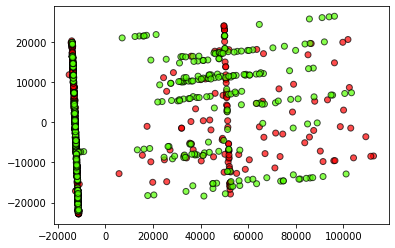

In [20]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.7847267939433838
F1-score [0.87310827 0.29067245]
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      4280
           1       0.18      0.73      0.29       277

    accuracy                           0.78      4557
   macro avg       0.58      0.76      0.58      4557
weighted avg       0.93      0.78      0.84      4557



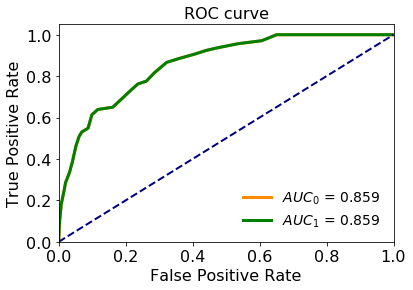

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)


y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.8422207592714506
F1-score [0.90874476 0.41781377]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4280
           1       0.27      0.93      0.42       277

    accuracy                           0.84      4557
   macro avg       0.63      0.88      0.66      4557
weighted avg       0.95      0.84      0.88      4557



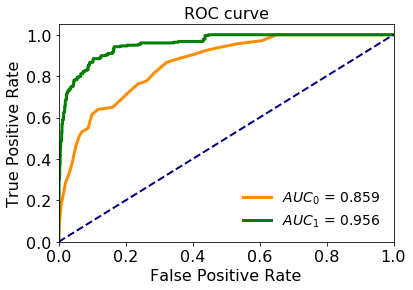

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_res, y_res, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.964 +/- 0.011


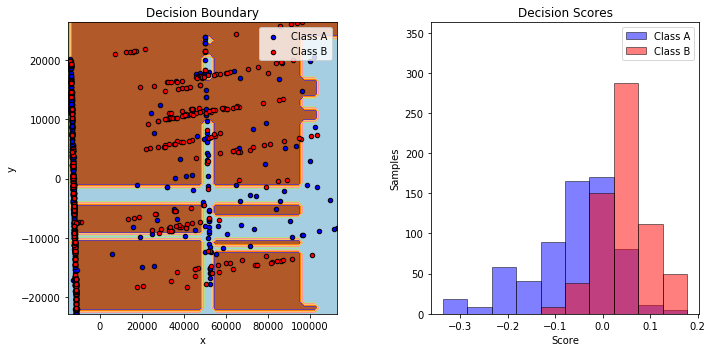

In [24]:
X=X_pca
y=y_res
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 10
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [25]:
import warnings
warnings.simplefilter("ignore")

**CondensedNearestNeighbour**

Resampled dataset shape Counter({0: 652, 1: 646})


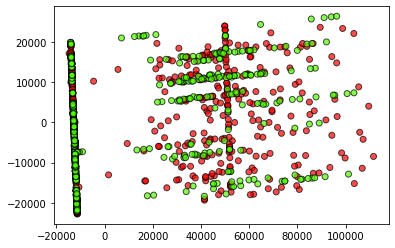

In [26]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.7788018433179723
F1-score [0.86809736 0.31521739]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4280
           1       0.19      0.84      0.32       277

    accuracy                           0.78      4557
   macro avg       0.59      0.81      0.59      4557
weighted avg       0.94      0.78      0.83      4557



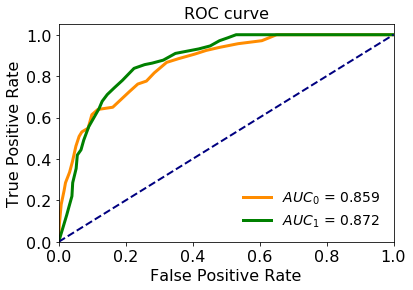

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.8409041035769146
F1-score [0.90851735 0.3902439 ]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4280
           1       0.25      0.84      0.39       277

    accuracy                           0.84      4557
   macro avg       0.62      0.84      0.65      4557
weighted avg       0.94      0.84      0.88      4557



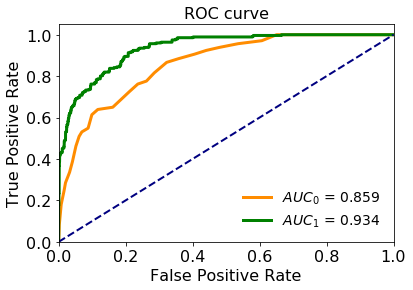

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.8562650866798333
F1-score [0.91790951 0.42290749]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      4280
           1       0.28      0.87      0.42       277

    accuracy                           0.86      4557
   macro avg       0.63      0.86      0.67      4557
weighted avg       0.95      0.86      0.89      4557



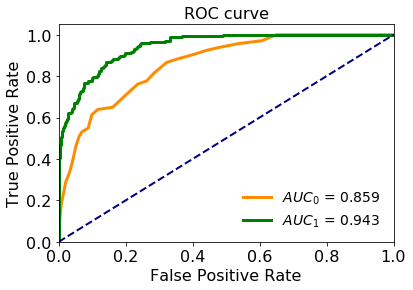

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=MLPClassifier(random_state=0,solver= 'adam', learning_rate_init= 0.01, hidden_layer_sizes=(15)))

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9934167215273206
F1-score [0.99648547 0.94809689]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4280
           1       0.91      0.99      0.95       277

    accuracy                           0.99      4557
   macro avg       0.95      0.99      0.97      4557
weighted avg       0.99      0.99      0.99      4557



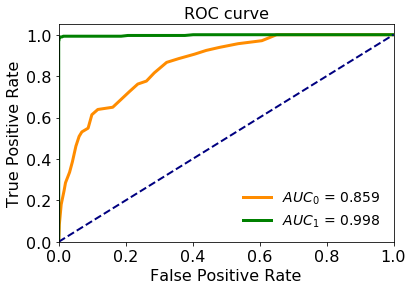

In [30]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**TOMELINKS**

Resampled dataset shape Counter({0: 652, 1: 646})


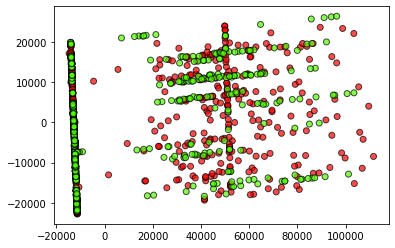

In [31]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.7788018433179723
F1-score [0.86809736 0.31521739]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4280
           1       0.19      0.84      0.32       277

    accuracy                           0.78      4557
   macro avg       0.59      0.81      0.59      4557
weighted avg       0.94      0.78      0.83      4557



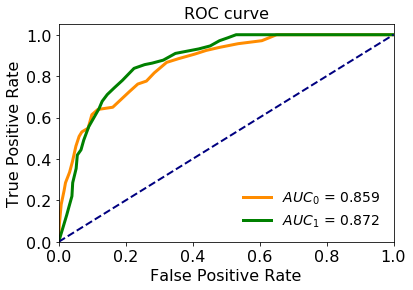

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.946017116524029
F1-score [0.9720645 0.2012987]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4280
           1       1.00      0.11      0.20       277

    accuracy                           0.95      4557
   macro avg       0.97      0.56      0.59      4557
weighted avg       0.95      0.95      0.93      4557



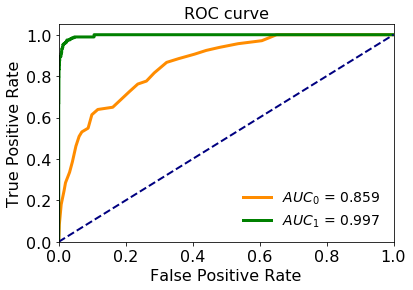

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

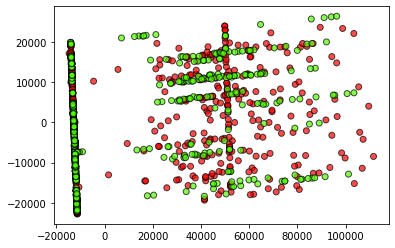

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
X_test_pca = pca.transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.8815009874917709
F1-score [0.93323442 0.47368421]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4280
           1       0.32      0.88      0.47       277

    accuracy                           0.88      4557
   macro avg       0.66      0.88      0.70      4557
weighted avg       0.95      0.88      0.91      4557



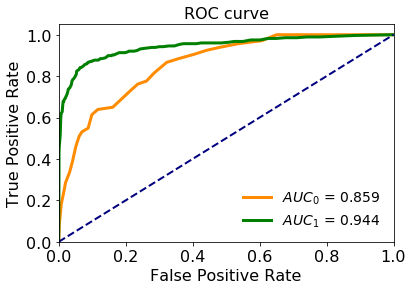

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)

clf.fit(X_pca, y_res)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

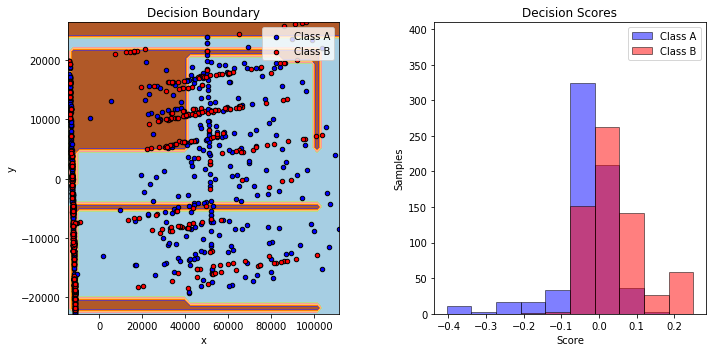

In [36]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause
X=X_pca
y=y_res
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 10
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

**NEAR MISS**

Resampled dataset shape Counter({0: 646, 1: 646})


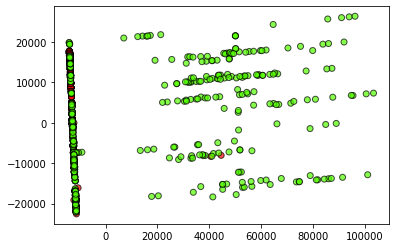

In [37]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.5229317533464999
F1-score [0.66294574 0.18393393]
              precision    recall  f1-score   support

           0       0.99      0.50      0.66      4280
           1       0.10      0.88      0.18       277

    accuracy                           0.52      4557
   macro avg       0.54      0.69      0.42      4557
weighted avg       0.93      0.52      0.63      4557



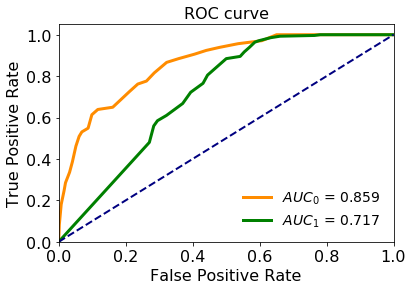

In [38]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.946017116524029
F1-score [0.9720645 0.2012987]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4280
           1       1.00      0.11      0.20       277

    accuracy                           0.95      4557
   macro avg       0.97      0.56      0.59      4557
weighted avg       0.95      0.95      0.93      4557



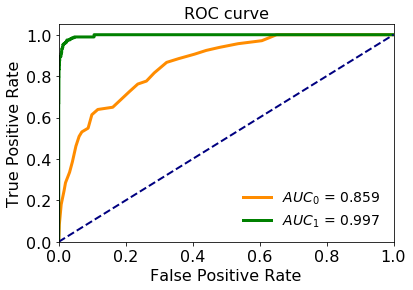

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Resampled dataset shape Counter({0: 9987, 1: 9987})
Resampled dataset shape Counter({0: 9987, 1: 9987})
Resampled dataset shape Counter({0: 9987, 1: 9907})
Resampled dataset shape Counter({0: 9987, 1: 9987})


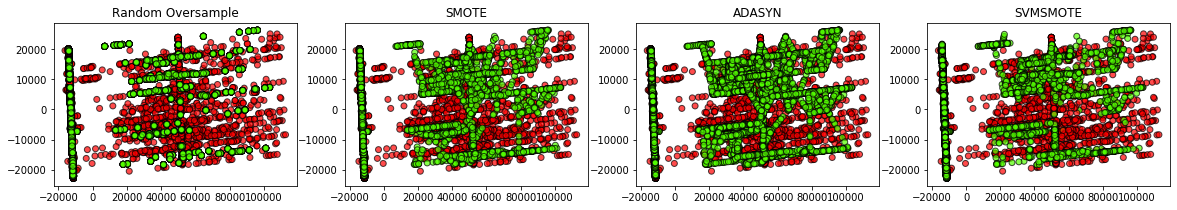

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(20,3))

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[0].set_title('Random Oversample')

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[1].set_title('SMOTE')

from imblearn.over_sampling import ADASYN
adasyn  = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[2].set_title('ADASYN')

from imblearn.over_sampling import SVMSMOTE
svm  =SVMSMOTE()
X_res, y_res = svm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
axes[3].scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[3].set_title('SVMSMOTE')

plt.show()

**RandomOverSampler**

In [41]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [42]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 9987, 1: 9987})


Accuracy 0.966864165020847
F1-score [0.98208141 0.78020378]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4280
           1       0.65      0.97      0.78       277

    accuracy                           0.97      4557
   macro avg       0.83      0.97      0.88      4557
weighted avg       0.98      0.97      0.97      4557



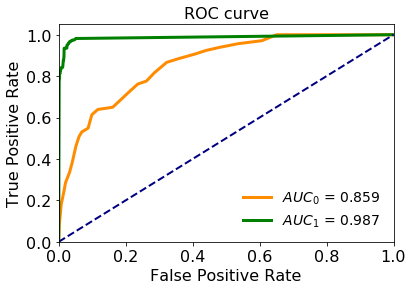

In [43]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9973666886109283
F1-score [0.99859846 0.97826087]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       0.98      0.97      0.98       277

    accuracy                           1.00      4557
   macro avg       0.99      0.99      0.99      4557
weighted avg       1.00      1.00      1.00      4557



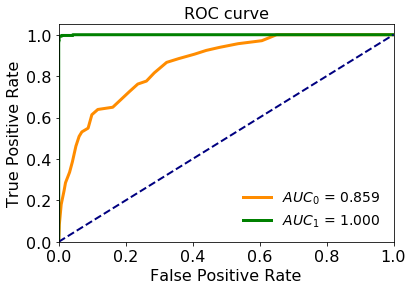

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [45]:
import pydotplus
from sklearn import tree
from IPython.display import Image

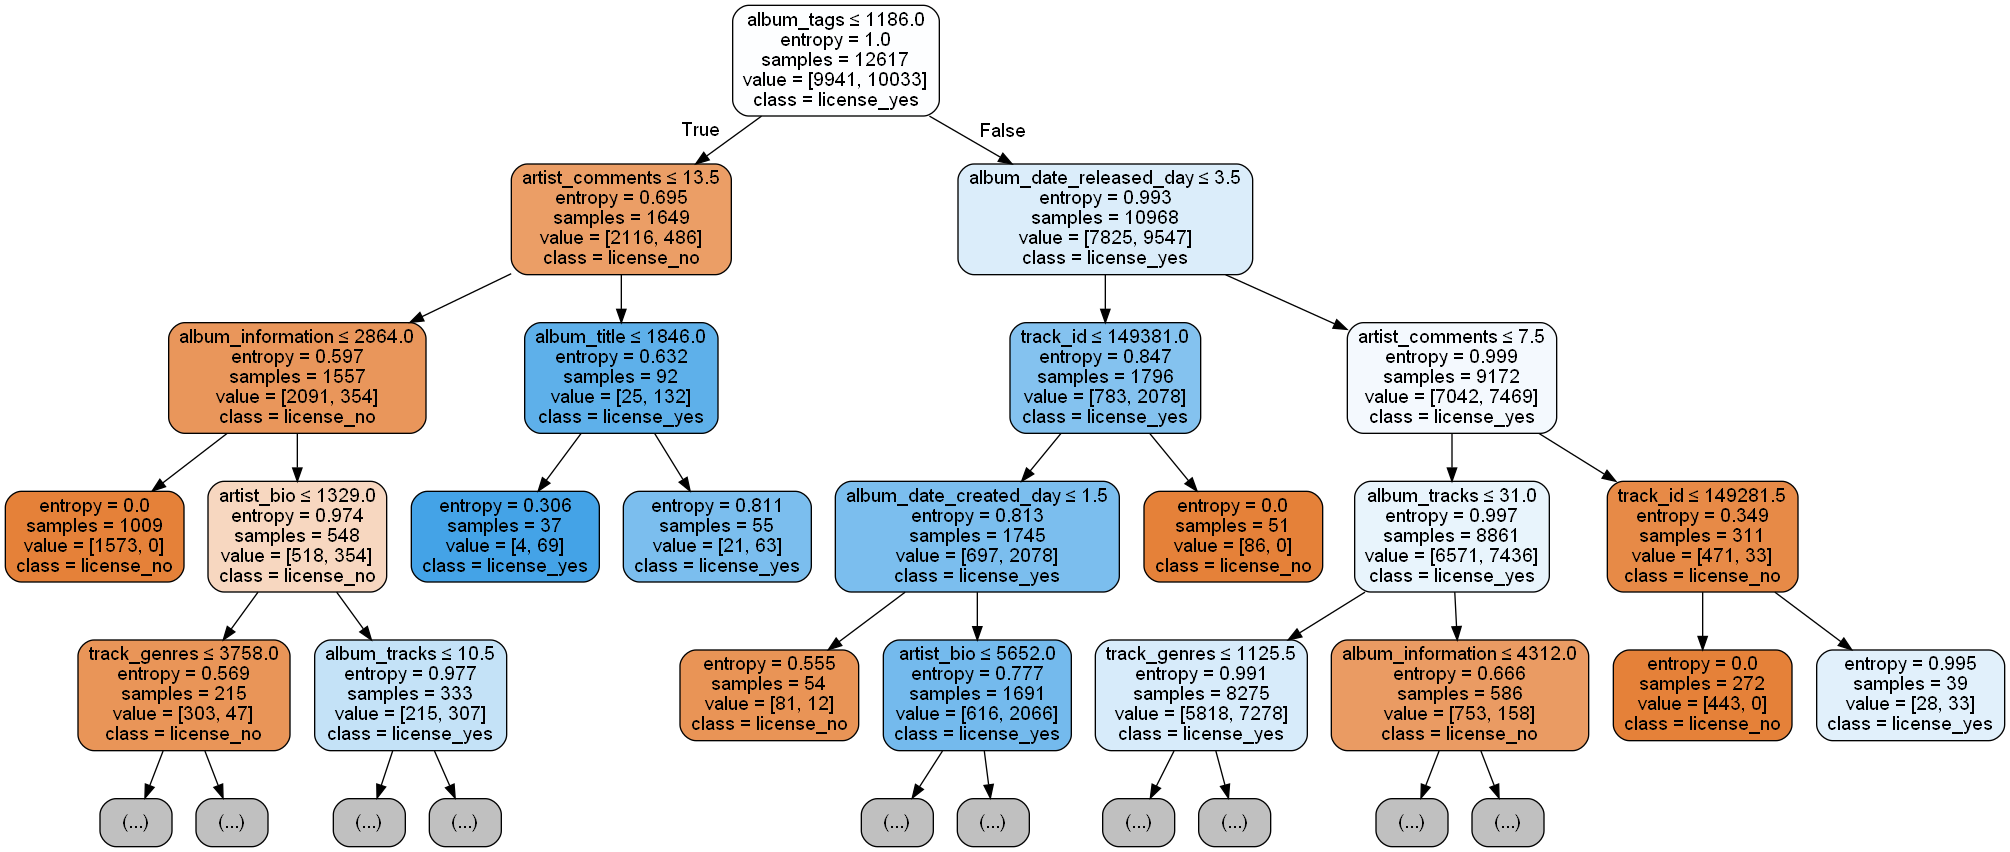

In [46]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                               class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Accuracy 0.9973666886109283
F1-score [0.99859748 0.97849462]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       0.97      0.99      0.98       277

    accuracy                           1.00      4557
   macro avg       0.99      0.99      0.99      4557
weighted avg       1.00      1.00      1.00      4557



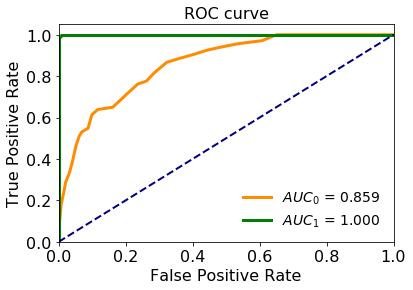

In [47]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=MLPClassifier(random_state=0,solver= 'adam', learning_rate_init= 0.01, hidden_layer_sizes=(15)))

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [48]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_],   
                                filled=True, rounded=True 
                                )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

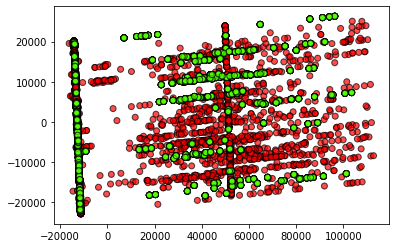

In [49]:
pca = PCA(n_components=2 )
pca.fit(X_train)
X_pca = pca.transform(X_res)
X_test_pca = pca.transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9736668861092824
F1-score [0.98592871 0.79522184]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4280
           1       0.75      0.84      0.80       277

    accuracy                           0.97      4557
   macro avg       0.87      0.91      0.89      4557
weighted avg       0.98      0.97      0.97      4557



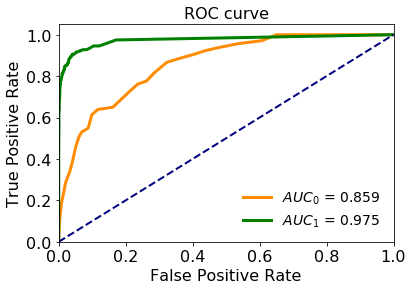

In [50]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)

clf.fit(X_pca, y_res)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

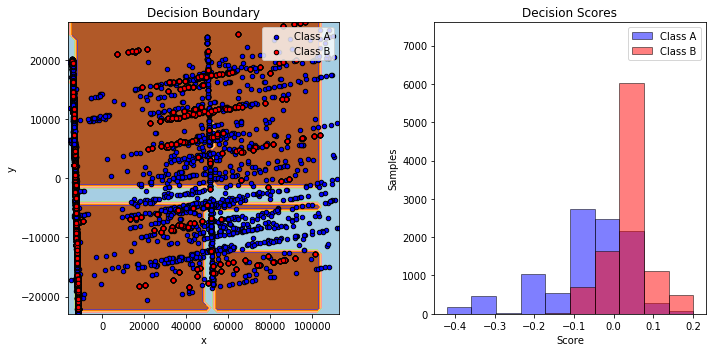

In [51]:
X=X_pca
y=y_res
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_pca, y_res)

plot_colors = "br"
plot_step = 10
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

**SMOTE**

In [52]:
svm = SMOTE(random_state=42)
X_res, y_res = svm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 9987, 1: 9987})


Accuracy 0.9411893789773974
F1-score [0.96787341 0.65284974]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4280
           1       0.51      0.91      0.65       277

    accuracy                           0.94      4557
   macro avg       0.75      0.93      0.81      4557
weighted avg       0.96      0.94      0.95      4557



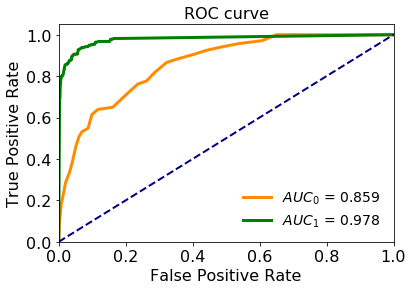

In [53]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9960500329163924
F1-score [0.99789621 0.96774194]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       0.96      0.97      0.97       277

    accuracy                           1.00      4557
   macro avg       0.98      0.99      0.98      4557
weighted avg       1.00      1.00      1.00      4557



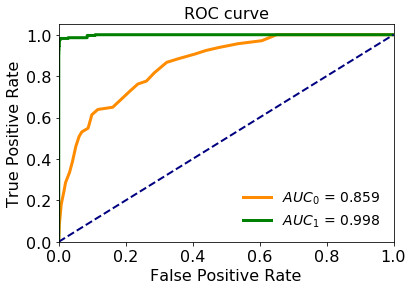

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9975861312266843
F1-score [0.9987163  0.97981651]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       1.00      0.96      0.98       277

    accuracy                           1.00      4557
   macro avg       1.00      0.98      0.99      4557
weighted avg       1.00      1.00      1.00      4557



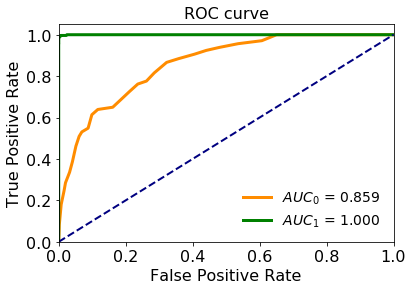

In [55]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)

Accuracy 0.9975861312266843
F1-score [0.9987163  0.97981651]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       1.00      0.96      0.98       277

    accuracy                           1.00      4557
   macro avg       1.00      0.98      0.99      4557
weighted avg       1.00      1.00      1.00      4557



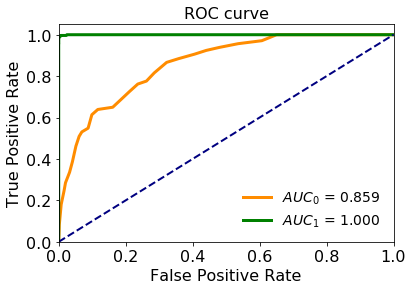

In [56]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
final_estimator=MLPClassifier(random_state=0,solver= 'adam', learning_rate_init= 0.01, hidden_layer_sizes=(5))
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)

**ADASYN**

In [57]:
from imblearn.over_sampling import ADASYN
adasyn  = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 9987, 1: 9907})


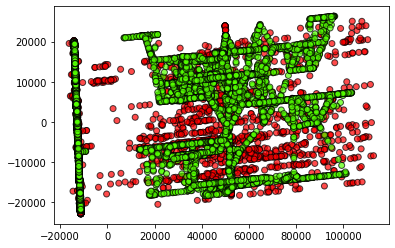

In [58]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9359227561992539
F1-score [0.96508847 0.61066667]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4280
           1       0.48      0.83      0.61       277

    accuracy                           0.94      4557
   macro avg       0.74      0.88      0.79      4557
weighted avg       0.96      0.94      0.94      4557



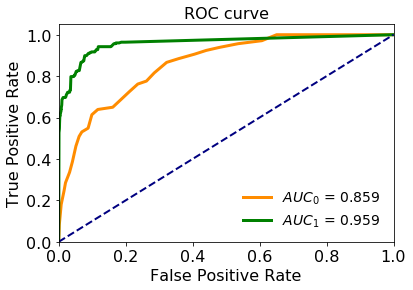

In [59]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


Accuracy 0.97761685319289
F1-score [0.98809802 0.8125    ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4280
           1       0.83      0.80      0.81       277

    accuracy                           0.98      4557
   macro avg       0.91      0.89      0.90      4557
weighted avg       0.98      0.98      0.98      4557



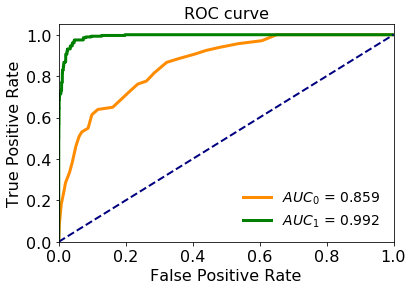

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

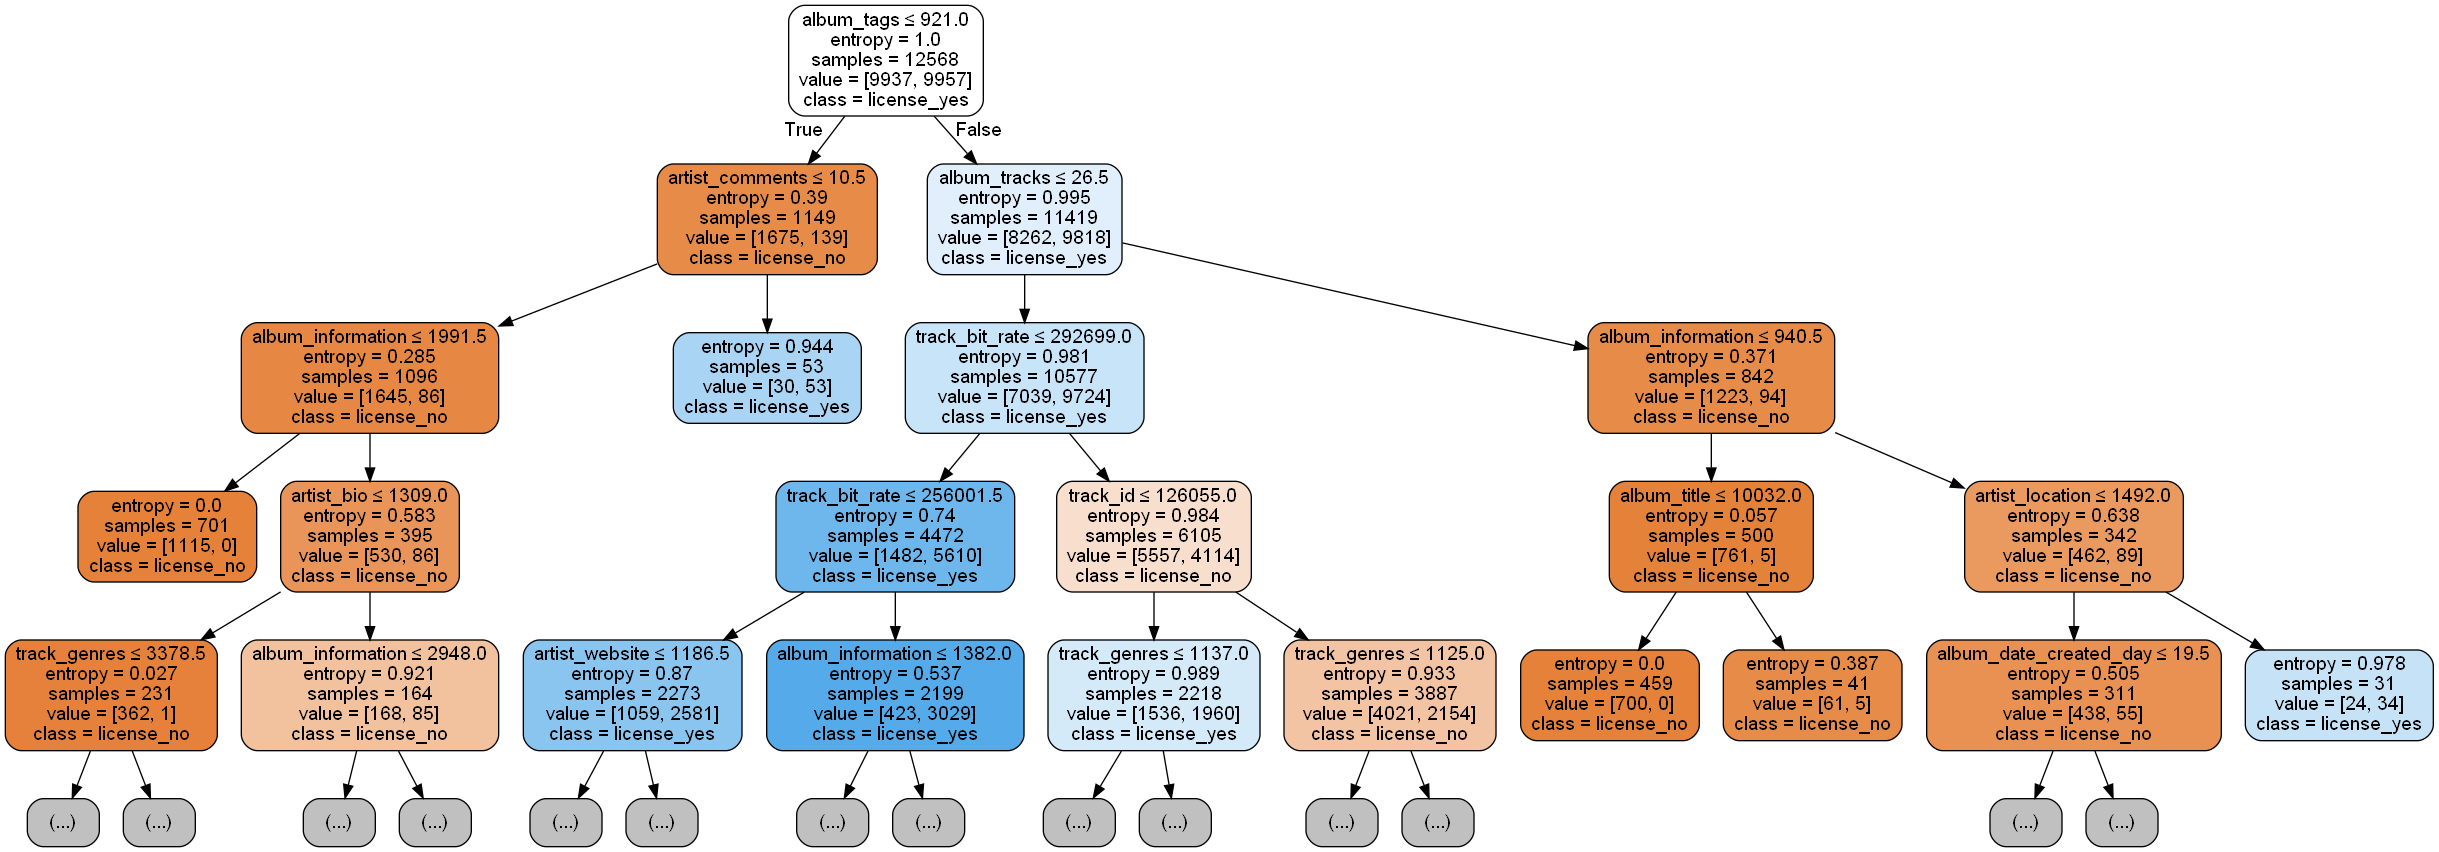

In [61]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_],
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Accuracy 0.9978055738424402
F1-score [0.99883287 0.98168498]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4280
           1       1.00      0.97      0.98       277

    accuracy                           1.00      4557
   macro avg       1.00      0.98      0.99      4557
weighted avg       1.00      1.00      1.00      4557



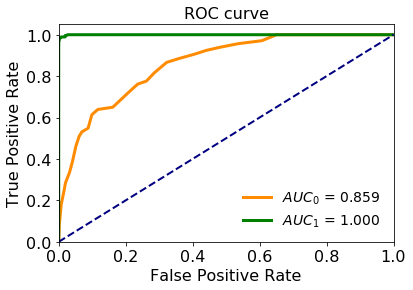

In [62]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**CLASS WEIGHT**

Accuracy 0.9392143954355936
F1-score [0.96865452 0.        ]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4280
           1       0.00      0.00      0.00       277

    accuracy                           0.94      4557
   macro avg       0.47      0.50      0.48      4557
weighted avg       0.88      0.94      0.91      4557



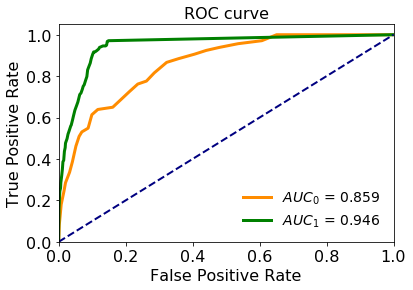

In [63]:
clf = DecisionTreeClassifier(min_samples_leaf=30, class_weight={0:19, 1: 1}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [64]:
X=X_train
y=y_train
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
RNG = 42
# Make some synthetic imbalanced binary classification data
X, y = make_classification(n_classes=2, class_sep=2, 
    weights=[0.97, 0.03], 
    n_informative=2, n_redundant=5, 
    flip_y=0.05, n_features=50, 
    n_clusters_per_class=1, 
    n_samples=1000, random_state=RNG)

metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = RandomForestClassifier()
for metric in metric_names:
    score1 = cross_val_score(clf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X, y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]

In [65]:
scores_df.T

,f1,roc_auc,average_precision,accuracy,precision,recall
Random-CV,0.676363,0.692906,0.56041,0.972991,0.896825,0.546366
Stratified-CV,0.678691,0.72251,0.60228,0.972991,0.92963,0.555556


In [66]:
scores_df

,Random-CV,Stratified-CV
f1,0.676363,0.678691
roc_auc,0.692906,0.72251
average_precision,0.56041,0.60228
accuracy,0.972991,0.972991
precision,0.896825,0.92963
recall,0.546366,0.555556


**SVMSMOTE**

In [ ]:
from imblearn.over_sampling import SVMSMOTE
svm = SVMSMOTE()
X_res, y_res = svm.fit_resample(X_train, y_train)

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
X=X_train
y=y_train
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
RNG = 42
# Make some synthetic imbalanced binary classification data
X, y = make_classification(n_classes=2, class_sep=2, 
    weights=[0.97, 0.03], 
    n_informative=2, n_redundant=5, 
    flip_y=0.05, n_features=50, 
    n_clusters_per_class=1, 
    n_samples=1000, random_state=RNG)

metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = RandomForestClassifier()
for metric in metric_names:
    score1 = cross_val_score(clf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X, y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]

In [ ]:
print(scores_df.T)

In [ ]:
scores_df

In [ ]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

In [ ]:
cost = [1, 10, 1, 1]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

In [ ]:
cost_mat

In [ ]:
cost = [1, 10, 1, 1]
cost = np.array(cost)

In [ ]:
y_train.shape

In [ ]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
cost_mat_test = np.array([cost] * len(X_test))
print(savings_score(y_test, y_pred, cost_mat_test))
print(savings_score(y_test, y_pred0, cost_mat_test))

In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve(y_test, y_score)
plt.show()

In [ ]:
tracks.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
DF1 = min_max_scaler.fit_transform(tracks.values)
pca = PCA(n_components=10)
df1 = pca.fit_transform(DF1)
df1.shape

In [ ]:
df1[class_name].value_counts()